In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读取数据
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [3]:
# 定义函数计算代价
def computeCost(X, y, theta):
    hs = np.power(((X * theta.T) - y),2)
    return np.sum(hs)/(2 * len(X))

In [4]:
# 取特征值与结果
X = data.iloc[:,0].to_frame()
y = data.iloc[:,1].to_frame()
m = data.shape[0]

# 特征值添加一列方便矩阵运算
X.insert(0,'x0',1)
print(m)

97


In [5]:
theta = np.mat('0,0')
# 取特征值与结果转为矩阵
X = np.mat(X)
y = np.mat(y)
print(theta)

[[0 0]]


In [6]:
# 计算当前代价
cost = computeCost(X, y, theta)
print(cost)

32.072733877455676


# 尝试理解视频5-6 矢量

`theta = theta - alpha / m * (X * theta.T - y).T * X` 将梯度下降函数使用**向量化** 之后的代码

In [7]:
# 定义梯度下降函数
def gradientDescent(X,y,theta,alpha,trainTimes):
    theta = theta.astype(float)
    parameterNum = int(theta.ravel().shape[1])
    m = len(X)
    cost = np.zeros(trainTimes)
    for i in range(trainTimes):
        error = (X * theta.T) - y
        for j in range(parameterNum):
            term = np.multiply(error, X[:,j])
            theta[0,j] = theta[0,j] - (alpha / m) * np.sum(term)
        cost[i] = computeCost(X, y, theta)
        
    return  theta, cost

# def gradientDescent(X,y,theta,alpha,trainTimes):
#     theta = theta.astype(float)
    
#     m = len(X)
#     cost = np.zeros(trainTimes)
#     for i in range(trainTimes):
#         theta = theta - alpha / m * (X * theta.T - y).T * X
#         cost[i] = computeCost(X,y,theta)
#     return theta ,cost
    

In [8]:
alpha = 0.024
iters = 1000

g,cost = gradientDescent(X,y,theta ,alpha,iters)
print(g)


[[-3.84372626  1.18780419]]


4.477218063976344


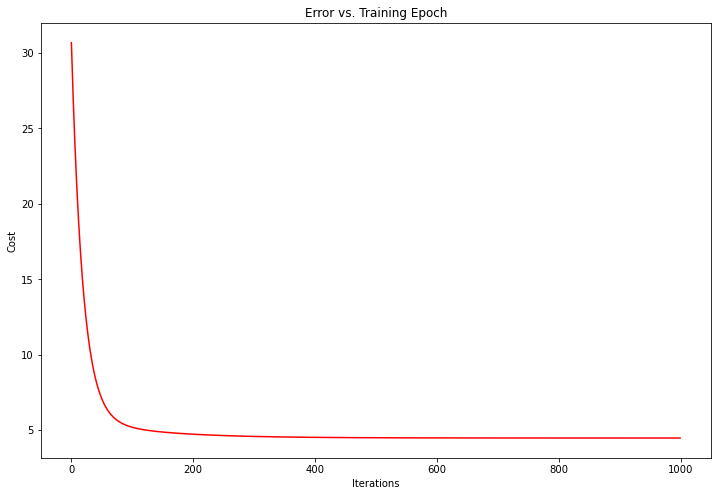

In [9]:
print(cost[-1])
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

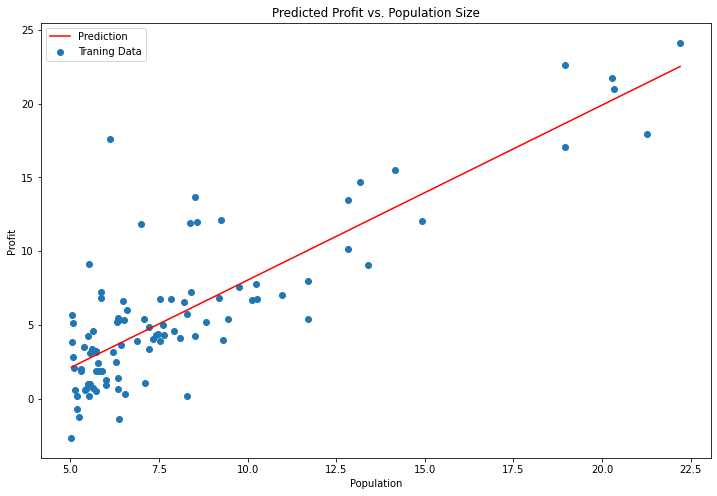

In [10]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [11]:
path2 =  'ex1data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

In [12]:
data2 = (data2 - data2.mean())/data2.std()
data2.head()

Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389

In [13]:
X2 = data2.iloc[:,0:2]
y2 = data2.iloc[:,2].to_frame()

X2.insert(0, 'x0', 1)
X2.head()


x0      Size  Bedrooms
0   1  0.130010 -0.223675
1   1 -0.504190 -0.223675
2   1  0.502476 -0.223675
3   1 -0.735723 -1.537767
4   1  1.257476  1.090417

In [14]:
theta2 = np.matrix(np.zeros(X2.shape[1]))
X2 = np.matrix(X2)
y2 = np.matrix(y2)
print(theta2)

[[0. 0. 0.]]


[[-1.10910099e-16  8.78503652e-01 -4.69166570e-02]]


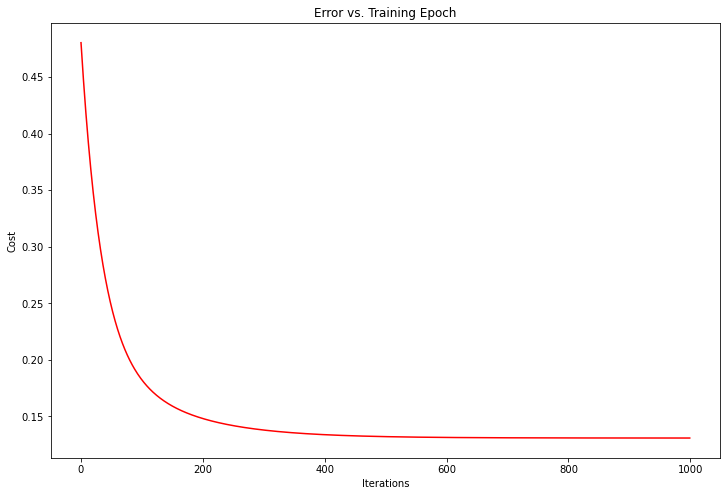

In [15]:
g2, cost2 = gradientDescent(X2, y2, theta2, 0.01, 1000)

print(g2)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1000), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 正规方程

In [16]:
theta3 = (X2.T * X2).I * X2.T * y2
print(theta3)

[[-1.11022302e-16]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
